# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 333

# Apartado 2: Recuperación de información

__Número de grupo: 11__

__Nombres de los estudiantes: EDURNE RUIZ y AITOR ESTEBAN__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('BBC News.csv')
df = df.drop(['ArticleId'], axis = 1)
df

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


In [4]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

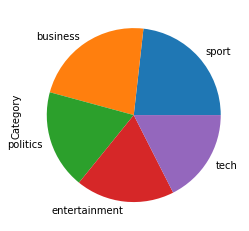

In [5]:
# Diagrama mostrando las categorias
df['Category'].value_counts().plot.pie()

In [6]:
df.values[23][0]

'ferguson urges henry punishment sir alex ferguson has called on the football association to punish arsenal s thierry henry for an incident involving gabriel heinze.  ferguson believes henry deliberately caught heinze on the head with his knee during united s controversial win. the united boss said it was worse than ruud van nistelrooy s foul on ashley cole for which he got a three-game ban.  we shall present it to the fa and see what they do. the tackle on heinze was terrible   he said. clubs are permitted to ask the fa to examine specific incidents but information is expected to be provided within 48 hours of the game. the clash occurred moments before half-time when a freddie ljungberg challenge left heinze on the ground on the left touchline. henry  following the ball  attempted to hurdle the argentine but his knee collided with the back of heinze s head.  the striker protested his innocence - and referee mike riley deemed the collision accidental. ferguson was also upset by arsena

Si analizamos el siguiente texto podemos podemos obsevar que es se trata de una noticia sobre un acontecimiento en un partido de futbol entre los equipos Arsenal y Manchester United. Se narra la controversia que hubo a raíz de una falta cometida por un jugador. Por tanto podemos clasificarlo como una noticia deportiva fijandonos en el tema y en las palabras clave utilizadas como 'football, game, defeat, arsenal, fouls, referee...'

In [7]:
df.values[23][1]

'sport'

Como habíamos supuesto en el apartado anterior, el texto está correctamente clasificado como deportivo. 

Por último, realizamos una partición de los datos, de forma que el 80% de ellos se usen como datos de entrenamiento y el 20% restante, como datos de test. 

In [8]:
train_data , test_data = train_test_split(df, train_size = 0.8, random_state = RANDOM_STATE)
len(train_data), len(test_data)


(1192, 298)

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

El primer paso es obtener las frecuencias de las palabras y lo haremos usando el diccionario que se inferirá de los términos de los documentos que se le pasan al CountVectorizer.

In [10]:
vectorizer = CountVectorizer(stop_words='english', binary=False)
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(train_data['Text'])
train_vector_data

<1192x22201 sparse matrix of type '<class 'numpy.int64'>'
	with 170840 stored elements in Compressed Sparse Row format>

In [11]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names[:5000])

22201
['00', '000', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0630', '069', '07', '070', '0710', '072', '0730', '08', '080', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '107', '108', '1080', '109', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120gb', '120m', '121', '1215', '1230', '125', '125m', '126', '127th', '128', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1337', '134', '135', '136', '137', '138m', '139', '13bn', '13m', '13s', '13s

In [12]:
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

Mostramos un mensaje aleatorio tanto entero como vectorizado y comparamos.

In [13]:
write_terms(feature_names, train_data['Text'].values , train_vector_data, 23)

Mensaje 23 : holmes starts 2005 with gb events kelly holmes will start 2005 with a series of races in britain.  holmes will make her first track appearance on home soil since winning double olympic gold in january s norwich union international in glasgow. she will also run in the grand prix in birmingham in february and may defend her indoor aaa 800m title in sheffield earlier that month.  i am still competitive and still want to win   she said.  i m an athlete and i can t wait to get back on the track.  she added:  these events are also a great opportunity to thank the british public for the enormous levels of support they have given me from the moment i stepped off that plane from greece.  the glasgow meeting will see holmes compete over 1500m in a five-way match against sweden  france  russia and italy.
Mensaje 23 vectorizado: ['1500m' '2005' '800m' 'aaa' 'added' 'appearance' 'athlete' 'birmingham'
 'britain' 'british' 'compete' 'competitive' 'defend' 'double' 'earlier'
 'enormous' 

Observamos que se eliminan todas las palabras que no aportan significado como las preposiciones, conjunciones, pronombres y algunos verbos nominales o comunes. Estas son las palabras que están dentro del conjunto de stopped_words del ingés y son eliminadas para reducir la dimensionalidad de las matrices y para que el entrenador solo tenga las palabras más relevantes que en un principio van a servir para clasificar.

Para calcular precisiones en el conjunto de prueba, debemos transformar también los mensajes en bolsas de palabras con TF/IDF usando el `CountVectorizer` y `TfidfTransformer` ajustados con el conjunto de entrenamiento.

In [14]:
tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(test_data['Text'])
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)

Calculamos la precisión@5 para cada una de las clases, que es la precisión a nivel de exhaustividad 5, que nos calcula cuantos de los 5 primeros documentos de una lista son de la clase deseada.
Consideramos que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [16]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [17]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [18]:
p5 = mean_precisions_per_class(train_preprocessed, train_data['Category'], test_preprocessed, test_data['Category'], 5)
p5

{'business': 84.38356164383562,
 'entertainment': 84.26229508196721,
 'politics': 88.66666666666667,
 'sport': 97.70491803278688,
 'tech': 88.83720930232558}

Dibujamos el diagrama de barras con la precisión@5 por clase para analizar los datos visualmente

<AxesSubplot:xlabel='Category'>

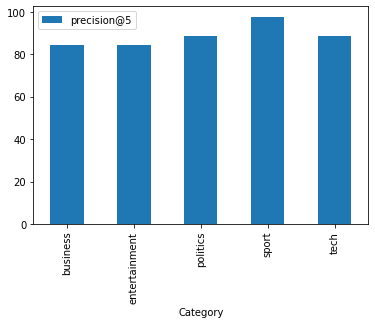

In [19]:
df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5['Category'] = ['business', 'entertainment', 'politics', 'sport', 'tech']

d = df_p5.set_index("Category")

d.plot.bar()

En todas las categorías, más del 80% de las consultas nos devolverán un texto de la categoría deseada. Estos porcentajes son bastante altos, y, por lo tanto, fiables. Podemos ver que es ligeramente mayor, casi rozando el 100%, para la categoría 'sport', lo que se puede deber a la aparición de vocabulario específico en estos textos y que guardan muy poca relación con  los otros temas. Por otro lado, la menor precisión registrada es 'entertainment' con un 84%. En esta categoría recoge temas muy amplios, por lo que dos textos pueden tener muy poco en común y aún así estar ambos en esta misma categoría (por ejemplo, una noticia sobre la ceremonia de los premios Óscar y el anuncio de gira de un grupo de música). A parte de ser un tema muy extenso, que abarca varios aspectos de la vida, también encuentra similitudes con otros temas en los que están clasificados estos textos, lo que hace más díficil poder encontrar documentos relevantes asociados con una consulta de entretenimiento.   

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

Cargamos y traducimos el fichero de la words-embeddings de Glove al formato word2vec, que reconoce Gensim, que en realidad es prácticamente idéntico al que ya tenemos.

In [20]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'glove.6B.50d.txt'
#glove_file = '/content/drive/MyDrive/Asignaturas/IA/IA2_21-22/Material/PLN/tmp/practica/Parte 1/glove.6B.50d.txt'

# Gensim 3 requiere hacerlo en varios pasos
#word2vec_file = 'glove.6B.50d.txt.word2vec'
#glove2word2vec(glove_file, word2vec_file)
#model = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)

# Gensim 4 puede transformar de glove a word2vec directamente
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

Creamos un vocabulario con todas las palabras del word-embeddings

In [21]:
we_vocabulary = list(model.key_to_index.keys())

print(we_vocabulary[0:10])

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]


Vectorizamos utilizando el vocabulario obtenido de las word.embeddings

In [22]:
vectorizerwe = CountVectorizer(vocabulary = we_vocabulary,stop_words='english', binary=False)
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_datawe=vectorizerwe.fit_transform(train_data['Text'])
train_vector_datawe

<1192x400000 sparse matrix of type '<class 'numpy.int64'>'
	with 169636 stored elements in Compressed Sparse Row format>

Aplicamos los pesos TF-IDF a nuestros datos vectorizados

In [23]:
tfidfer = TfidfTransformer()
train_preprocessedwe = tfidfer.fit_transform(train_vector_datawe)

test_vector_datawe=vectorizerwe.transform(test_data['Text'])
test_preprocessedwe=tfidfer.fit_transform(test_vector_datawe)

In [24]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

Aplicamos el modelo de word-embeddings a nuestro vector de palabras en el que previamente habíamos usado los pesos TF-IDF

In [25]:
doc_embed_matrix = create_doc_embedding(train_preprocessedwe,model)
# contiene un vector "embedding" para cada documento
doc_embed_matrix

array([[ 0.00794175,  0.01705104, -0.01855913, ...,  0.00727405,
        -0.01975189,  0.02405652],
       [ 0.00536644,  0.01252589,  0.0140877 , ..., -0.00154335,
         0.01681921, -0.01005512],
       [ 0.0022235 , -0.00437085,  0.01384607, ..., -0.00090964,
        -0.0027213 ,  0.00075259],
       ...,
       [-0.00682233,  0.00391371,  0.01101578, ..., -0.00546989,
        -0.00277311,  0.00523289],
       [ 0.01630543, -0.00279613,  0.0028525 , ...,  0.0374361 ,
         0.01281606, -0.01754476],
       [ 0.0037437 , -0.00261042,  0.00349485, ...,  0.01850674,
         0.01283986,  0.00905975]])

In [26]:
doc_test_embed_matrix = create_doc_embedding(test_preprocessedwe,model)
doc_test_embed_matrix

array([[ 0.01893471,  0.00612426,  0.0066691 , ..., -0.0008087 ,
        -0.00868633, -0.01675636],
       [ 0.00151841, -0.00418998, -0.03060933, ..., -0.01278092,
         0.01871666, -0.0237693 ],
       [ 0.01491417,  0.01291672, -0.00561923, ...,  0.01949441,
        -0.00422223, -0.01036158],
       ...,
       [ 0.00874533,  0.00581114, -0.00181629, ..., -0.01366179,
        -0.0065521 ,  0.00492588],
       [ 0.01549625,  0.01237827,  0.03584277, ...,  0.03563324,
        -0.01344139, -0.03487768],
       [ 0.01486787,  0.00045955,  0.01219599, ...,  0.00930455,
        -0.00434948,  0.00309813]])

Vamos a usar como pesos la frecuencia de aparición de cada palabra.

Calculamos la precisión@5 para cada una de las clases, que es la precisión a nivel de exhaustividad 5, que nos calcula cuantos de los 5 primeros documentos de una lista son de la clase deseada.
Consideramos que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

In [27]:
p5we = mean_precisions_per_class(doc_embed_matrix, train_data['Category'], doc_test_embed_matrix, test_data['Category'], 5)
p5we

{'business': 86.84931506849315,
 'entertainment': 93.77049180327869,
 'politics': 92.33333333333333,
 'sport': 98.36065573770492,
 'tech': 91.16279069767442}

<AxesSubplot:xlabel='Category'>

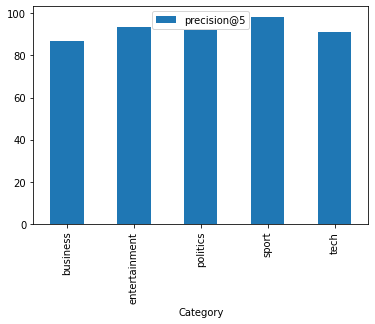

In [28]:
df_p5we = pd.DataFrame.from_dict(p5we, orient='index', columns=['precision@5'])

df_p5we['Category'] = ['business', 'entertainment', 'politics', 'sport', 'tech']

d1 = df_p5we.set_index("Category")

d1.plot.bar()

De misma forma que en el apartado anterior, sport es la categoría con más precisión probablemente por las causas mencionadas anteriormente. Observamos también que en general la precisión de todas las categorías es mayor. Esto se debe a que en este caso hemos utilizado el vocabulario de word-embeddings que nos aporta más información de relación semántica entre las palabras. Es por ello que ante las consultas se devuelven textos relevantes de forma más eficiente.

In [29]:
df_p5['precision@5'].values


array([84.38356164, 84.26229508, 88.66666667, 97.70491803, 88.8372093 ])

In [30]:
import matplotlib.pyplot as plt

Dibujamos a continuación una tabla con los resultados de los dos apartados para compararlos visualmente y sacar conclusiones

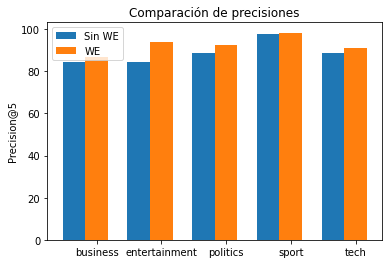

In [31]:
values =  df_p5['precision@5'].values
valueswe = df_p5we['precision@5'].values
 
 
numero_de_grupos = len(values)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, values, width=ancho_barras, label='Sin WE')
plt.bar(indice_barras + ancho_barras, valueswe, width=ancho_barras, label='WE')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('business', 'entertainment', 'politics', 'sport', 'tech') )
 
plt.ylabel('Precision@5')
plt.title('Comparación de precisiones')
 
plt.show()

Observamos que en todas las categorías, utilizar el vocabulario de word-embeddings nos da mejores resultados a la hora de realizar una consulta. Como hemos mencionado antes, este vocabulario aporta información semántica sobre cómo están relacionadas las palabras entre sí. Por ello es más sencillo devolver textos relevantes ante una consulta, pues tenemos la misma información que antes más el añadido semántico. Por ello los porcentajes son muy altos aunque la mejora más notoria la vemos en la categoría de 'entertainent' que como habíamos comentado, la amplitud en el vocabulario y la diversidad en los temas de los textos de esta categoría puede hacer que se confunda con otras. Sin embargo la aplicación del vocabulario de word-embeddings consigue tener menos en cuenta esto. 

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [116]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

En el gráfico visto anteriormente se intuye que la categoría con más mejora al utilizar word-embeddings es 'entertainment'. Lo comprobamos y observamos que hay casi un 9 % de mejora.

<BarContainer object of 5 artists>

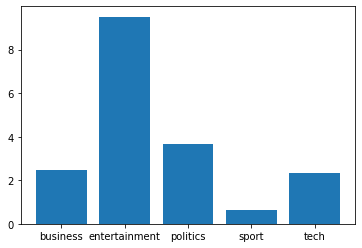

In [33]:
names = ['business', 'entertainment', 'politics', 'sport', 'tech'] 
values =  df_p5['precision@5'].values
valueswe = df_p5we['precision@5'].values

restavalues = valueswe - values

plt.bar(names, restavalues)

In [88]:
def precisions_in_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k de las consultas para las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    indice_consultas = {y: [] for y in np.unique(y_test)}
    i = 0
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        indice_consultas[y_query].append(i)
        i = i+1
        
    return y_precisions, indice_consultas

Calculamos las precisiones de cada consulta sin hacer la media para poder encontrar el texto con mayor diferencia en la categoria de entretenimiento

In [92]:
precisiones1, consultas1 = precisions_in_class(train_preprocessed, train_data['Category'], test_preprocessed,  test_data['Category'], 5)

In [93]:
precisioneswe, consultaswe = precisions_in_class(doc_embed_matrix, train_data['Category'], doc_test_embed_matrix,  test_data['Category'], 5)

In [113]:
array_precisiones1 = np.array(precisiones1['entertainment'])
array_precisiones1

array([  0., 100.,  40., 100., 100., 100., 100.,  80., 100., 100., 100.,
        60., 100., 100., 100., 100., 100., 100., 100.,  60.,   0.,  40.,
       100., 100., 100.,   0.,  80., 100., 100., 100., 100.,  40., 100.,
       100.,  80., 100.,  80.,  60., 100., 100., 100.,  80., 100., 100.,
       100., 100., 100., 100., 100., 100.,  60., 100.,  60.,  60., 100.,
       100.,  80., 100.,  60.,  20., 100.])

In [114]:
array_precisioneswe = np.array(precisioneswe['entertainment'])
array_precisioneswe

array([  0., 100.,  80., 100., 100., 100., 100., 100.,  80., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.,  60., 100., 100.,
       100., 100., 100.,  60., 100., 100., 100., 100., 100.,  60., 100.,
       100., 100., 100.,  80., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100.,   0., 100., 100.])

In [115]:
diferencias = array_precisiones1 - array_precisioneswe

A partir del array de diferencias, buscamos el índice donde se encuentra la consulta con más aumento de precisión al usar word-embeddings, es decir, en la que la resta sea mayor. Vemos que la diferencia es de un 100% de mejora en esa consulta, es decir, la primera vectorización se obtenía un 0% y con word-embeddings 100%

In [40]:
indice = np.where(diferencias == np.amax(diferencias)) 
indice

(array([20], dtype=int64),)

In [41]:
ind = 20
diferencias[ind]

100.0

El indice de la consulta con más aumento de precisión al usar word-embeddings es el siguiente

In [101]:
consultasaux = np.array(consultas1['entertainment'])
indice_consulta = consultasaux[ind]
indice_consulta

110

A continuación mostramos el texto original seguido de los términos que aparecen en las dos vectorizaciones usadas

In [102]:
write_terms(feature_names, test_data['Text'].values , test_vector_data, indice_consulta)

Mensaje 110 : holmes wins  2004 top tv moment  sprinter kelly holmes  olympic victory has been named the top television moment of 2004 in a bbc poll.  holmes  800m gold medal victory beat favourite moments from drama  comedy and factual programmes  as voted by television viewers. natasha kaplinsky s strictly come dancing win was top entertainment moment and a little britain breast feeding sketch won the comedy prize. the 2004 tv moments will be shown on bbc one at 2000 gmt on wednesday. double gold medal winner holmes topped the best sports moment category  beating maria sharapova s wimbledon triumph and matthew pinsent s rowing victory at the olympics.  she then went on to take the overall prize of golden tv moment. the sight of former royal correspondent jennie bond with dozens of rats crawling over her in itv s i m a celebrity get me out of here was named best factual entertainment moment. michael buerk s return to ethiopia  20 years after originally reporting its famine  topped the

In [103]:
feature_nameswe = vectorizerwe.get_feature_names()
write_terms(feature_nameswe,None,test_vector_datawe,indice_consulta)

Mensaje 110 vectorizado: ['years' 'world' 'long' 'wednesday' 'won' 'best' 'win' '20' 'come'
 'little' 'went' 'television' 'return' 'named' 'victory' '2000' 'britain'
 'title' '2004' 'gold' 'michael' 'running' 'popular' 'tv' 'sports' 'beat'
 'olympic' 'royal' 'overall' 'double' 'winner' 'character' 'originally'
 'olympics' 'moment' 'medal' 'shown' 'gmt' 'bond' 'poll' 'wins' 'prize'
 'voted' 'entertainment' 'dozens' 'golden' 'drama' 'beating' 'comedy'
 'category' 'programme' 'bbc' 'reporting' 'maria' 'kelly' 'viewers'
 'moments' 'matthew' 'wimbledon' 'sight' 'ethiopia' 'celebrity' 'breast'
 'dancing' 'correspondent' 'triumph' 'topped' 'feeding' 'strictly' 'soap'
 'programmes' 'holmes' 'favourite' 'den' 'dot' 'watts' 'famine' 'rats'
 'sketch' 'sharapova' 'rowing' 'itv' 'sprinter' 'factual' 'natasha'
 'crawling' 'confided' '800m' 'eastenders' 'jennie' 'unwell' 'pinsent'
 'kaplinsky' 'buerk'] 



Identificamos ahora las noticias recuperadas en ambos casos a raíz de utilizar el texto anterior como consulta.

In [107]:
idx1 = knn(test_preprocessed[indice_consulta], train_preprocessed, 5)
idx1

array([ 23, 992, 117, 915, 421], dtype=int64)

In [108]:
idxwe = knn(doc_test_embed_matrix[indice_consulta], doc_embed_matrix, 5)
idxwe

array([1135,  408,  266,  811, 1048], dtype=int64)

A continuación observamos las categorías de estos textos.

In [110]:
categories1 = np.take(train_data['Category'], idx1)
categories1

1420    sport
197     sport
660     sport
1121    sport
88      sport
Name: Category, dtype: object

In [111]:
categorieswe = np.take(train_data['Category'], idxwe)
categorieswe

173     entertainment
187     entertainment
883     entertainment
1410    entertainment
1153    entertainment
Name: Category, dtype: object

En efecto y como veíamos, con TF-IDF puro, se recuperan textos de 'sport' en todos los casos ante la consulta por lo que como decíamos, la precisión es 0% mientras que al incorporar word-embeddings , la precisión es 100% porque recupera textos de 'entertainment' en todos los casos.

Mostramos la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.

In [135]:
terms1 = terms_in_message(feature_names, train_vector_data,23)

In [136]:
terms_consulta1 = terms_in_message(feature_names, test_vector_data, indice_consulta)

In [137]:
interseccion1 = terms1.intersection(terms_consulta1)
print(interseccion1)

{'gold', 'double', '800m', 'moment', 'holmes', 'olympic', 'win', 'britain', 'kelly', 'title'}


Mostramos la intersección de términos entre la consulta y la ultima noticia bien recuperada usando word-embeddings.

In [141]:
termswe = terms_in_message(feature_nameswe, train_vector_datawe, 1153)

In [142]:
terms_consultawe = terms_in_message(feature_nameswe, test_vector_datawe, indice_consulta)

In [143]:
interseccionwe = termswe.intersection(terms_consultawe)
print(interseccionwe)

{'years', 'television', 'poll', 'overall', 'running', 'moment', 'bbc', 'long', 'world', 'come', 'little', 'voted', 'britain', 'michael', 'tv', 'victory'}


A la luz de toda la información que hemos visto, vamos a analizar por qué con word-embeddings se ha clasificado eficientemente la pregunta y con TF-IDF no. El texto de la noticia trata sobre que un evento deportivo ha sido nombrado como el mejor momento televisivo en 2004. A partir de ahí, el texto habla sobre otros momentos televisivos icónicos y los compara también con otros eventos deportivos. Vemos que la clasificación usando TF-IDF puro es de deporte ya que a pesar de que el texto sea de la categoría entretenimiento, utiliza palabras relacionadas con el deporte en varias ocasiones ya que el acontecimiento televisivo ha sido deportivo. Por tanto, como TF-IDF da importancia a la frecuencia con la que aparecen palabras en el texto, y las palabras de deporte son recurrentes en textos de deporte y no en otros textos del corpus de otras categorías, como por ejemplo las que coinciden con el texto mal clasificado: "sport, olymppic, win,...", se recuperan noticias relacionadas con deporte.

Sin embargo, al aplicar el vocabulario de word-embeddings, se añade a las palabras un valor semántico que permite relacionarlas con otras palabras. Este extra de información hace que se puedan recuperar textos de entretenimiento que tienen palabras muy relacionadas con nuestro texto. Vemos que las palabras de uno de los textos recuperados son "television, poll, moment, tv, bbc" por lo que las relaciones entre palabras de word-embeddings ha hecho que el texto esté más relacionado con temas de entretenimiento que de deporte. Seguramente estas palabras mencionadas no tengan mucha relación con palabras en un texto deportivo y sí con uno de entretenimiento.